# Chapter 3 - Classification

## Setup

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
#It also requires Scikit-Learn ≥ 1.0.1:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:

from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## MNIST

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
"""The MINST data set contains images, and DataFrames aren't ideal for that, so it´s preferable 
    to set as_frame = False to get the data as Numpy arrays instead."""

c:\Users\Geralt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


"The MINST data set contains images, and DataFrames aren't ideal for that, so it´s preferable \n    to set as_frame = False to get the data as Numpy arrays instead."

In [6]:
# Let's look at these arrays:
X,y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
X.shape #there are 70,000 images, and each image has 784 feactures.
        # because each image is 28x28 pixels. And each feacture simply represents one pixel's intensity


(70000, 784)

In [8]:
y # this is the target. 

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
#to see the data type of mnist
print(mnist)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

In [10]:
# we can to decribe the minst dataset with:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [11]:
# lests to see the keys
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [12]:
# let's look a element of thos mnist dataset

some_digit = X[0]
print(some_digit)
# only digits!

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

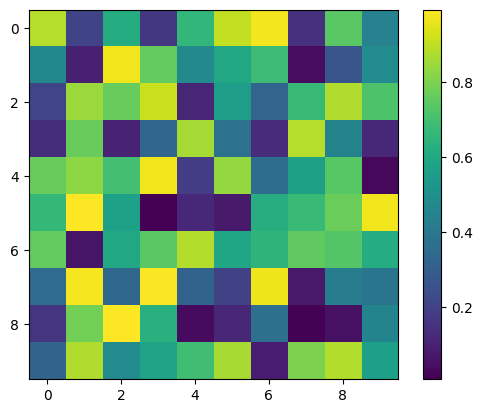

In [13]:
# probably you what to see this data like a image. The proces is somethig like this:

import numpy as np
import matplotlib.pyplot as plt

# generate a ramdom array
array_numerico = np.random.rand(10, 10)  # Array 10x10 whit random values between 0 and 1 
#Plot using imshow()
plt.imshow(array_numerico, cmap='viridis')  # cmap='viridis' choise the colors 

plt.colorbar()  # Add a color bar
plt.show()

In [14]:
# let's look a element of this mnist dataset like a image
# function to plot images

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap='binary') #imshow() takes a data matrix and show it in 2D. Where each value is a image pixel
                      # cmap='binary' use the black-white scale.
    plt.axis("off")

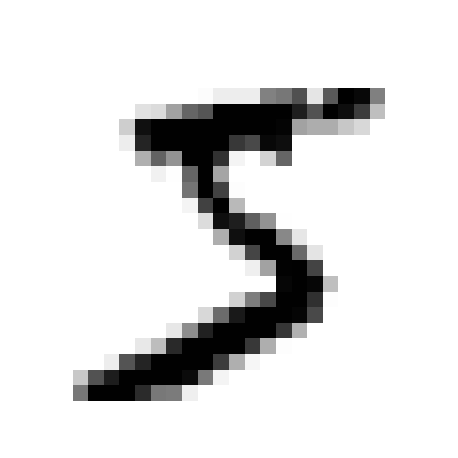

In [15]:
# so the figure:

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")
plt.show()

In [16]:
#thats look like a 5. And indeed is a 5:
y[0]

'5'

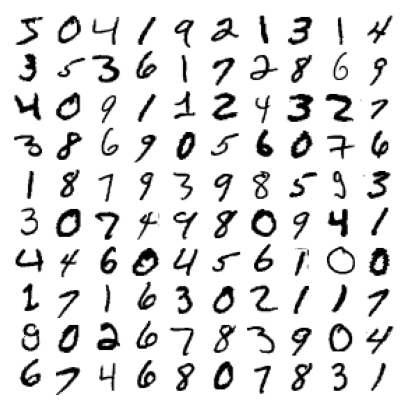

In [17]:
# To see most elements of the mnist dataset:

plt.figure(figsize=(5,5)) #size in 5x5 inches
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10,10,idx + 1)#idx +1, because the index start in 1. 
    plot_digit(image_data) # call to plot with the plot_digit() function
plt.subplots_adjust(wspace=0,hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

In [18]:
# now we need to create a test set and set it aside before inspectig the data closely
# indeed, the data set provided by fetch_openml() is actually already split for the test set
# with the last 10,000 images
X_train, X_test, y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]
# the training set is already shuffled. This guarantees that all crosss-validation folds will be similar.

## Training a Binary classifier

In [19]:
# now we simplify the problem, and for now only try to identify one digit. Like number 5.
# So we need to boulid a "5-detector",  and distinguishing just two class: 5 and non-5

# we need to create a new matrix with the next values:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [20]:
#  We Choise the stochastic gradient descent classifier (SGD), or stochastic GD.

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [21]:
# now we can use it to detect images of the number 5:
sgd_clf.predict([some_digit]) # remenber, some_digit = X[0]
# Output is True because some_digit = 5
# for this element the classifier guessest right. But we need to evaluate more data.
# Now, let's evaluate this model's performance!!

array([ True])

## Performance Measures

 Evaluating a classifier is often significantly trickier than evaluating a regressor

 ### Measuring Accuracy Using Cross-Validation

In [22]:
# let's  use the cross_val_score() function to evaluate our SGDClassifier model
# using k-fold cross-validation with three folds

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# above 95% acuraccy on all cross-validation folds.

array([0.95035, 0.96035, 0.9604 ])

In [23]:
# now let's look to see  a dummy classifier that just classifies every single image
# in the most frequent class (non-5)

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier() # this classifier is a protocol to compare the our model vs a simple model
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

# print False because not detect 5s

False


In [24]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# above 90%!But this is because only about 10% of the images are 5s
# So, if you always guess that an images is not a 5, you wil be right about 90% of the time.

array([0.90965, 0.90965, 0.90965])

This demonstrates why accuracy is generally not the preferred performance
measure for classifiers, especially when you are dealing with skewed datasets
(i.e., when some classes are much more frequent than others). A much better
way to evaluate the performance of a classifier is to look at the confusion
matrix (CM).

The accuracy is not recommended for imbalanced datasets!

### Confusion Matrix

The general idea of a confusion matrix is to count the number of times
instances of class A are classified as class B, for all A/B pairs. For example,
to know the number of times the classifier confused images of 8s with 0s, you
would look at row #8, column #0 of the confusion matrix.

"It shows how confused our model is."


In [25]:
# To work with confucion matix, we need a set of predictors. For that we can to use
# the cross_val_predict() function:

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # this work with folds, in this case there are 3 folds, cv = 3.

In [26]:
"""
The first row considers non-5 images (the negative class)
The second row consirers the images of 5s (positive class)


[[53892,   687], 53892 elements are considered like non-5 (True negatives). And 687 were wrongly classified as 5s, (false positives, Type I errors).
[ 1891,  3530]], 1891 elements were wrongly classified as non-5s, (False negatives, Type II errors). And 3530 were correctly classified as 5s (True positives)

Precision: Is the proportion of the True positives between all the predicted positives.
Recall: Is the proportion of the True positives between the other all True positive cases.


[Spanish]
Precision: Es la proporción de verdaderos positivos entre todos los positivos predichos. 
Recall: Es la proporción de verdaderos positivos entre todos los verdaderos casos positivos predichos.

Alta precisión: Pocos falsos positivos, pero puede haber más falsos negativos, disminuyendo el recall.
Alto recall: Se detectan más verdaderos positivos, pero también aumentan los falsos positivos, disminuyendo la precisión.


"""


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

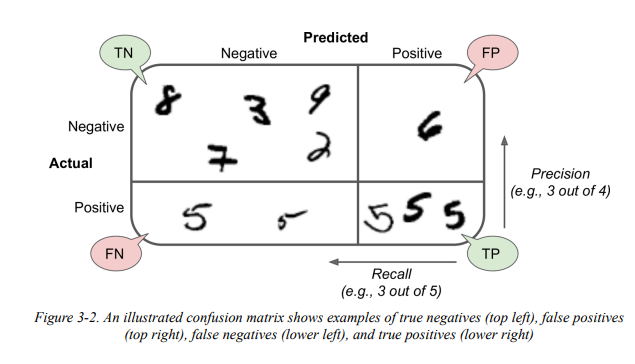

In [27]:
# A perfect classifier would only have true positives and true negatives, 
# so its confusion matrix would have nonzero values only on its main diagonal
#  (top left to bottom right), and see like this:

y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Precision and Recall

The confusion matrix gives you a lot of information. But there exist another metric, the accuracy of the positive predictions; this is called the precision of the classifier:

$$\frac{TP}{TP+FP}$$

$TP$, is the number of True positives.

$TF$, is the number of False positives.

If precison = 1, we have 100% of precision.

This metric is typically used along with another metric named recall, also called sensitivity or the true positive rate (TPR).  This is the ratio of positive instances that are correctly detected by the classifier:

$$recall = \frac{TP}{TP+FN}$$

$FN$  is, of course, the number of false negatives.

Presicion and Recall are incluiding in Scikit-Learn:

In [28]:
from sklearn.metrics import precision_score, recall_score


# Presicion:
print(precision_score(y_train_5, y_train_pred))  # == 3530 / (687 + 3530) 


# Recall:
print(recall_score(y_train_5, y_train_pred))  # == 3530 / (1891 + 3530)

# the 5-detetor does not look as shiny as it did when we looket at its accuracy.

"""
 When the model claims that an image represents a 5, is correct only 83.7% of the time.
 Moreover, it only detects 65.1% of the 5s.
 
"""

0.8370879772350012
0.6511713705958311


'\n When the model claims that an image represents a 5, is correct only 83.7% of the time.\n Moreover, it only detects 65.1% of the 5s.\n \n'

It is often convenient to combine precision an recall into a single metric called the $F_1$ Score, specially when you need a single metric to compare two classifiers. The $F_1$ is the $harmonic$ $mean$ of precision and recall:

$$ F_1 = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} = \frac{TP}{TP + \frac{FN + FP}{2}}$$

In [29]:
# To compute the $F_1$ score, simply call:

from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

The F score favors classifiers that have similar precision and recall. This is
not always what you want: in some contexts you mostly care about
precision, and in other contexts you really care about recall. For example, if
you trained a classifier to detect videos that are safe for kids, you would
probably prefer a classifier that rejects many good videos (low recall) but
keeps only safe ones (high precision), rather than a classifier that has a
much higher recall but lets a few really bad videos show up in your product
(in such cases, you may even want to add a human pipeline to check the
classifier’s video selection). On the other hand, suppose you train a
classifier to detect shoplifters in surveillance images: it is probably fine if
your classifier has only 30% precision as long as it has 99% recall (sure, the
security guards will get a few false alerts, but almost all shoplifters will get
caught).

Unfortunately, you can’t have it both ways: increasing precision reduces
recall, and vice versa. This is called the precision/recall trade-off (equilibro entre precision y recall)

### The Precisioin/Recall Trade-off

to take desicions, the SGDClassifier have a score, this score work with a
threshold, with this thereshold the model asign the instances like a negative
or a positive class. 

Scikit-Learn does not let you set the threshold directly, but it does give you
access to the decision scores that it uses to make predictions. Instead of
calling the classifier’s $\textbf{predict()}$ method, you can call its $\textbf{decision\_function()}$
method, which returns a score for each instance, and then use any threshold
you want to make predictions based on those scores:

In [39]:
y_scores = sgd_clf.decision_function([some_digit])

"""
y_scores, is the decision puntuation: 
The higher the score, the more confident the prediction that the sample belongs to the positive class.
This score represents the distance of the sample from the decision hyperplane in the feature space, 
and it can take any real value, positive or negative.
"""
y_scores #Output: array([2164.22030239]) 

array([2164.22030239])

In [41]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

"""
Here is where you set an explicit decision threshold. In this case, the 
threshold is 0. Then you compare the decision score with this threshold to 
make a binary prediction. If the score is higher than the threshold, 
y_some_digit_pred will be True, indicating that the model classifies some_digit
as belonging to the positive class.

"""

y_some_digit_pred # output is True

array([ True])

In [43]:
# What happend if: y_scores < threshold ?

threshold = 3000 # Now, here  y_scores < threshold
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred 
# The output is False, because: y_scores< threshold
# The image actually represents a 5, and the classifier detects it when the threshold is 0,
# but it misses it when the threshold is increased to 3,000.

array([False])

In [42]:
sgd_clf.predict([some_digit]) # this returns the same results as decision_function()
                              # but with this you can't stablishing the threshold.
                              # Increasing the threshold decreases recall.

array([ True])

How do you decide which threshold to use? First, use the $\textbf{cross\_val\_predict()}$
function to get the scores of all instances in the training set, but this time
specify that you want to return decision scores instead of predictions:

In [44]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
"""By obtaining decision scores through cross-validation, you get a more 
   reliable estimate of how the model generalizes to unseen data.
"""

With these scores, use the $\text{precision\_recall\_curve()}$ function to compute
precision and recall for all possible thresholds (the function adds a last
precision of 0 and a last recall of 1, corresponding to an infinite threshold):

In [45]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Finally, use Matplotlib to plot precision and recall as functions of the
threshold value. Let’s show the threshold of 3,000 we selected:

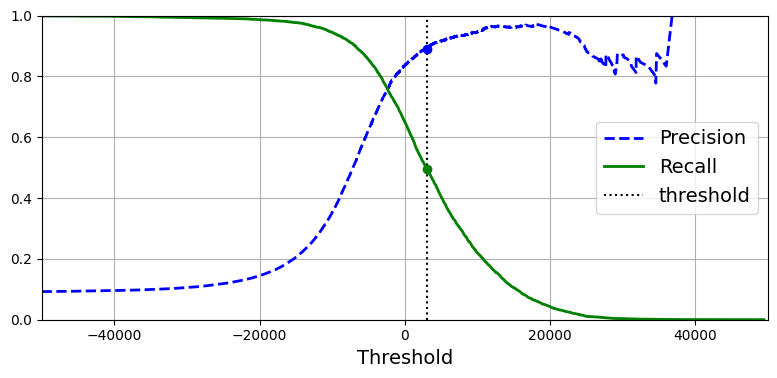

In [48]:

plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")



# extra code – this section just beautifies and saves the figure
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

In the image, the precision is near 90% and recall is around 50%.

Another way to select a good precision/recall trade-off is to plot precision
directly against recall:


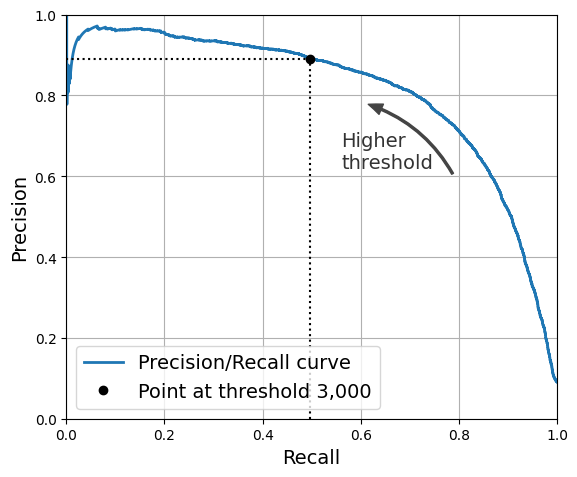

In [49]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

You can see that precision really starts to fall sharply at around 80% recall.
You will probably want to select a precision/recall trade-off just before that drop—for example, at around 60% recall. But of course, the choice depends on your project.

Suppose you decide to aim for 90% precision. You could use the first plot to find the threshold you need to use, but that’s not very precise. Alternatively, you can search for the lowest threshold that gives you at least 90% precision.
For this, you can use the NumPy array’s argmax() method. This returns the first index of the maximum value, which in this case means the first True value:

In [50]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

To make predictions (on the training set for now), instead of calling the
classifier’s predict() method, you can run this code:

In [51]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)


Let’s check these predictions’ precision and recall:

In [52]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [53]:

recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

Great, you have a 90% precision classifier! As you can see, it is fairly easy to
create a classifier with virtually any precision you want: just set a high
enough threshold, and you’re done. But wait, not so fast–a high-precision
classifier is not very useful if its recall is too low! For many applications,
48% recall wouldn’t be great at all.

If someone says, “Let’s reach 99% precision”, you should ask, “At what recall?

### The ROC Curve

The receiver operating characteristic (ROC) curve is another common tool
used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate (FPR).
The FPR (also called the fall-out) is the ratio of negative instances that are
incorrectly classified as positive. It is equal to 1 – the $true$ $negative$ rate
(TNR), which is the ratio of negative instances that are correctly classified as negative. The TNR is also called $specificity$. Hence, the ROC curve plots
$sensitivity$ (recall TPR, True Positive Rate) versus $1$ – $specificity$.

To plot the ROC curve, you first use the roc_curve() function to compute the
TPR and FPR for various threshold values:

In [55]:

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Then you can plot the FPR against the TPR using Matplotlib. The following
code produces the plot. To find the point that corresponds to
90% precision, we need to look for the index of the desired threshold. Since
thresholds are listed in decreasing order in this case, we use <= instead of >=
on the first line:

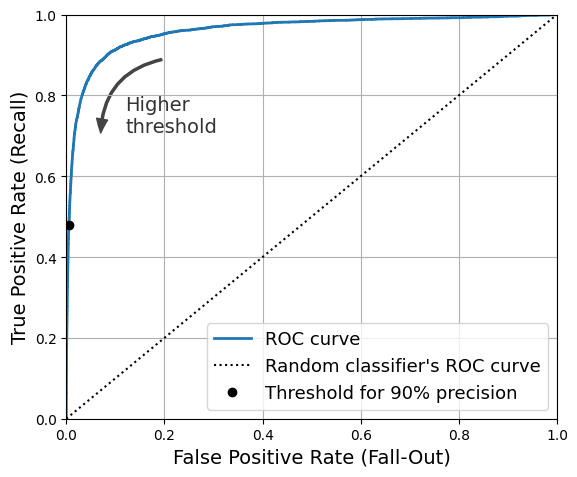

In [56]:

idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

- 90% precision and 48% recall

Once again there is a trade-off: the higher the recall (TPR), the more false
positives (FPR) the classifier produces. The dotted line represents the ROC
curve of a purely random classifier; a good classifier stays as far away from
that line as possible (toward the top-left corner).
One way to compare classifiers is to measure the area under the curve
(AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a
purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn
provides a function to estimate the ROC AUC:


In [57]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores) # this is the area under the curve ROC (ROC AUC).

0.9604938554008616

Since the ROC curve is so similar to the precision/recall (PR) curve, you may wonder how
to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever
the positive class is rare or when you care more about the false positives than the false
negatives. Otherwise, use the ROC curve. For example, looking at the previous ROC
curve (and the ROC AUC score), you may think that the classifier is really good. But this
is mostly because there are few positives (5s) compared to the negatives (non-5s). In
contrast, the PR curve makes it clear that the classifier has room for improvement: the
curve could really be closer to the top-right corner.


In [58]:
# now a RandomForestClassifier, whose PR curve and F_1 score we can compare to those
# of the SGDClassifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [59]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
"""This line is performing both actions: training the random forest model and conducting
 cross-validation to predict class probability values for each instance in the training set.
"""

In [62]:
# Let’s look at the class probabilities for the first two images in the training set:
y_probas_forest[:2]
# The model predicts that the first image is positive with 89% probability, and
# it predicts that the second image is negative with 99% probability.

array([[0.11, 0.89],
       [0.99, 0.01]])

In [64]:
# the precision_recall_curve() function:

y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)


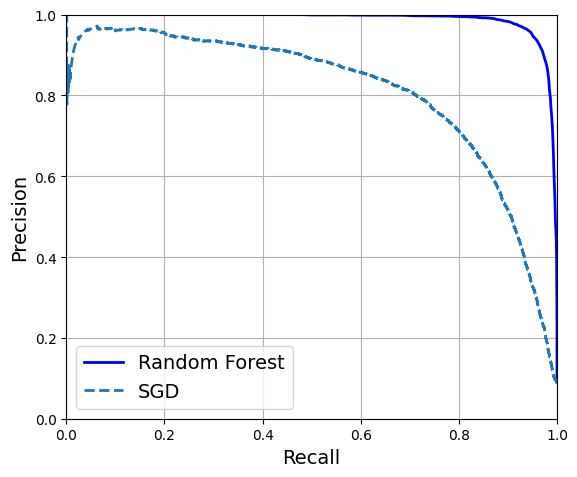

In [65]:
# plot the PR curve, but not only the RanfomFores's PR curve, is useful 
# to plot the first PR curve as well to see how they compare 
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

RandomForestClassifier’s PR curve looks
much better than the SGDClassifier’s

In [67]:
# The f_1 score:

y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [68]:
# the ROC AUC
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

Both metrics: The ROC AUC and the $F_1$ score, are best that the same scores to SGDClassifier.

## Multiclass Classification

Some Scikit-Learn classifiers (LogisticRegression,
RandomForestClassifier, and GaussianNB) are capable of handling multiple
classes natively. SGDClassfier is binary. However, there are various strategies that you can use to perform multiclass classification with multiple binary classifiers.

One way to create a system that can classify the digit images into 10 classes
(from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an
image, you get the decision score from each classifier for that image and you
select the class whose classifier outputs the highest score. This is called the
one-versus-the-rest (OvR) strategy, or sometimes one-versus-all (OvA).

Another strategy is to train a binary classifier for every pair of digits: one to
distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s,
and so on. This is called the one-versus-one (OvO) strategy. If there are N
classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem,
this means training 45 binary classifiers! When you want to classify an
image, you have to run the image through all 45 classifiers and see which
class wins the most duels. The main advantage of OvO is that each classifier
only needs to be trained on the part of the training set containing the two
classes that it must distinguish.

Some algorithms (such as support vector machine classifiers) scale poorly
with the size of the training set. For these algorithms OvO is preferred
because it is faster to train many classifiers on small training sets than to train
few classifiers on large training sets. For most binary classification
algorithms, however, OvR is preferred.

Scikit-Learn detects when you try to use a binary classification algorithm for
a multiclass classification task, and it automatically runs OvR or OvO,
depending on the algorithm. Let’s try this with a support vector machine
classifier using the sklearn.svm.SVC class. We’ll only train
on the first 2,000 images, or else it will take a very long time:







In [69]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5

SVC(random_state=42)

That was easy! We trained the SVC using the original target classes from 0 to
9 (y_train), instead of the 5-versus-the-rest target classes (y_train_5). Since
there are 10 classes (i.e., more than 2), Scikit-Learn used the OvO strategy
and trained 45 binary classifiers. Now let’s make a prediction on an image:


In [72]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

That’s correct! This code actually made 45 predictions—one per pair of
classes—and it selected the class that won the most duels.

The rason of the 45 classifiers:
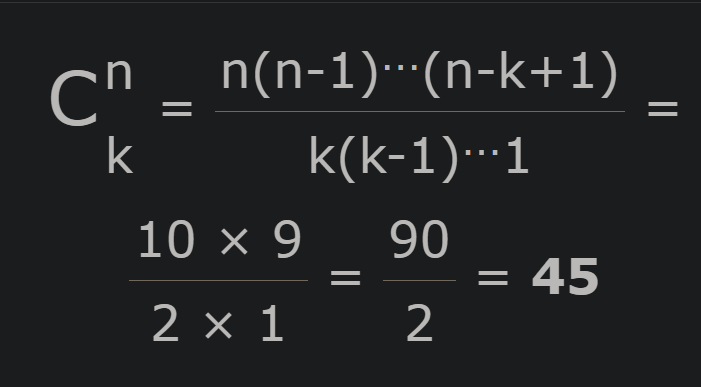


 If you call the
$decision\_ function()$ method, you will see that it returns 10 scores per
instance: one per class. Each class gets a score equal to the number of won
duels plus or minus a small tweak (max ±0.33) to break ties, based on the
classifier scores

In [73]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

The highest score is 9.3, and it’s indeed the one corresponding to class 5:

In [74]:

class_id = some_digit_scores.argmax()
class_id

5

If you want to force Scikit-Learn to use one-versus-one or one-versus-therest, you can use the OneVsOneClassifier or OneVsRestClassifier classes.
Simply create an instance and pass a classifier to its constructor (it doesn’t
even have to be a binary classifier). For example, this code creates a
multiclass classifier using the OvR strategy, based on an SVC:


In [75]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])


OneVsRestClassifier(estimator=SVC(random_state=42))

Let’s make a prediction, and check the number of trained classifiers:


In [76]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [77]:
len(ovr_clf.estimators_)

10

Training an SGDClassifier on a multiclass dataset and using it to make
predictions is just as easy:

In [78]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

Oops, that’s incorrect. Prediction errors do happen! This time Scikit-Learn
used the OvR strategy under the hood: since there are 10 classes, it trained 10
binary classifiers. The decision_function() method now returns one value per
class. Let’s look at the scores that the SGD classifier assigned to each class:

In [79]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

You can see that the classifier is not very confident about its prediction:
almost all scores are very negative, while class 3 has a score of +1,824, and
class 5 is not too far behind at –1,386. Of course, you’ll want to evaluate this
classifier on more than one image. Since there are roughly the same number
of images in each class, the accuracy metric is fine. As usual, you can use the
cross_val_score() function to evaluate the model:


In [80]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

It gets over 85.8% on all test folds. If you used a random classifier, you
would get 10% accuracy, so this is not such a bad score, but you can still do
much better. Simply scaling the inputs (as discussed in Chapter 2) increases
accuracy above 89.1%:


In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## Error Analysis

Now is time to improve the model. First, look the confusion matrix. for this, you fist need to make predictions using the cross_val_predict(); then you can pass the labels and prediction s to the confusion_matrix() function, just like you did earlier. However, since there are now 10 classes instead of 2, the confusion matrix will contain quite a lot of numbers, and it may be hard to read.

A colored diagram of the confusion matrix is much easier to analyze. To plot
such a diagram, use the ConfusionMatrixDisplay.from_predictions() function
like this:

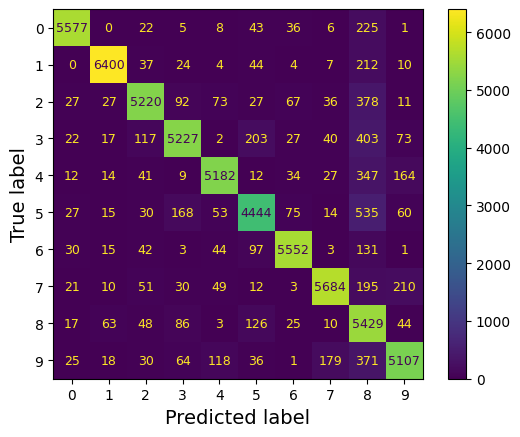

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

 This confusion matrix looks
pretty good: most images are on the main diagonal, which means that they
were classified correctly. Notice that the cell on the diagonal in row #5 and
column #5 looks slightly darker than the other digits. This could be because
the model made more errors on 5s, or because there are fewer 5s in the
dataset than the other digits. That’s why it’s important to normalize the
confusion matrix by dividing each value by the total number of images in the
corresponding (true) class (i.e., divide by the row’s sum). This can be done
simply by setting normalize="true". We can also specify the
values_format=".0%" argument to show percentages with no decimals. The
following code produces the diagram:

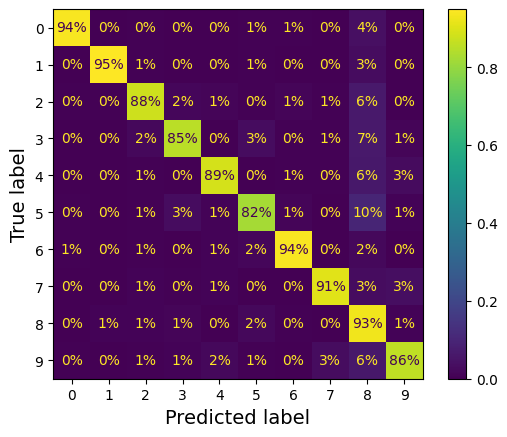

In [83]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()
# in the big diagonal we can see the True positives percent predicted for each class.

Now you can see much more clearly the kinds of errors the classifier makes.
The column for class 8 is now really bright, which confirms that many
images got misclassified as 8s. In fact this is the most common
misclassification for almost all classes. But be careful how you interpret the
percentages in this diagram: remember that we’ve excluded the correct
predictions. For example, the 36% in row #7, column #9 does not mean that
36% of all images of 7s were misclassified as 9s. It means that 36% of the
errors the model made on images of 7s were misclassifications as 9s. In
reality, only 3% of images of 7s were misclassified as 9s

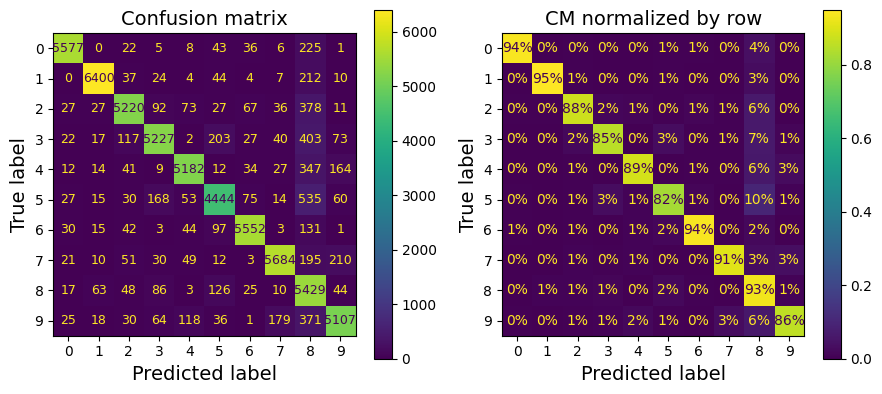

In [84]:
# extra code – Confusion matrix (left) and the same CM normalized by row (right)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
save_fig("confusion_matrix_plot_1")
plt.show()

Analyzing the confusion matrix often gives you insights into ways to improve
your classifier. Looking at these plots, it seems that your efforts should be
spent on reducing the false 8s. For example, you could try to gather more
training data for digits that look like 8s (but are not) so that the classifier can
learn to distinguish them from real 8s. Or you could engineer new features
that would help the classifier—for example, writing an algorithm to count the
number of closed loops (e.g., 8 has two, 6 has one, 5 has none). Or you could
preprocess the images (e.g., using Scikit-Image, Pillow, or OpenCV) to make
some patterns, such as closed loops, stand out more.

Analyzing individual errors can also be a good way to gain insights into what
your classifier is doing and why it is failing. For example, let’s plot examples
of 3s and 5s in a confusion matrix style


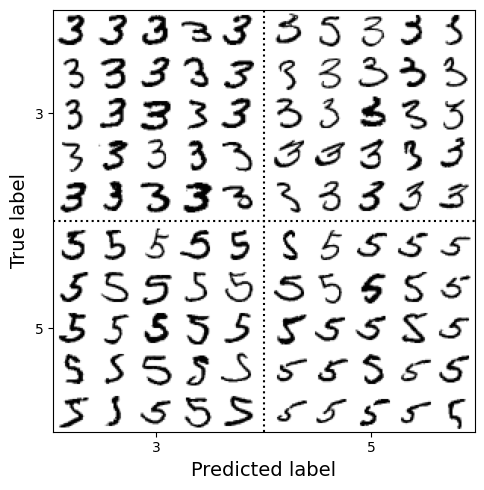

In [87]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]


size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.show()

As you can see, some of the digits that the classifier gets wrong (i.e., in the
bottom-left and top-right blocks) are so badly written that even a human
would have trouble classifying them.

Recall that we used a simple SGDClassifier, which is just a linear model: all
it does is assign a weight per class to each pixel, and when it sees a new
image it just sums up the weighted pixel intensities to get a score for each
class. Since 3s and 5s differ by only a few pixels, this model will easily
confuse them.


## Multilabel Classification

Until now, each instance has always been assigned to just one class. But in
some cases you may want your classifier to output multiple classes for each
instance. Consider a face-recognition classifier: what should it do if it
recognizes several people in the same picture? It should attach one tag per
person it recognizes. Say the classifier has been trained to recognize three
faces: Alice, Bob, and Charlie. Then when the classifier is shown a picture of
Alice and Charlie, it should output [True, False, True] (meaning “Alice yes,
Bob no, Charlie yes”). Such a classification system that outputs multiple
binary tags is called a multilabel classification system.



## Multioutput Classification

The last type of classification task we’ll discuss here is called multioutput–
multiclass classification (or just multioutput classification). It is a
generalization of multilabel classification where each label can be multiclass
(i.e., it can have more than two possible values).